# Практика: pandas та matplotlib
---
У цьому ноутбуці зібрані завдання для практики роботи з бібліотеками **pandas** та **matplotlib**.

Спочатку виконай імпорт потрібних бібліотек, а потім рухайся по розділах.

## Розділ 1. Основи pandas: створення та перегляд даних
**Мета:** навчитися створювати `DataFrame`, переглядати структуру та базову інформацію.

**Завдання 1–10:**
1. Імпортуй бібліотеки `pandas` і `numpy` (вже зроблено вище, але спробуй сам у новій комірці).
2. Створи простий DataFrame з трьох стовпців: `"Name"`, `"Age"`, `"City"` (5–7 рядків).
3. Виведи перші 5 рядків DataFrame.
4. Виведи інформацію про типи даних (`.info()`) і статистику (`.describe()`).
5. Виведи назви всіх стовпців і індексів.
6. Зміни порядок стовпців у DataFrame.
7. Встанови стовпець `"Name"` як індекс.
8. Перейменуй стовпець `"City"` на `"Hometown"`.
9. Зроби копію DataFrame і додай новий стовпець `"Country"` зі значенням `"Ukraine"`.
10. Виведи тільки стовпці `"Name"` та `"Age"`.

In [275]:
# Імпорт основних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
# 2. Створи простий DataFrame з трьох стовпців: `"Name"`, `"Age"`, `"City"`

df = pd.DataFrame({
    "Name": ["Anna", "Maria", "Taras", "Mark", "Max"],
    "Age": [15, 20, 65, 12, 43],
    "City": ["Kyiv", "London", "New York", "Paris", "Madrid"]
})

In [277]:
# 3. Виведи перші 5 рядків DataFrame

df.head()
# df.tail(2)

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris
4,Max,43,Madrid


In [278]:
# 4. Виведи інформацію про типи даних (`.info()`) і статистику (`.describe()`).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [279]:
df.describe()

,Age
count,5.000000
mean,31.000000
std,22.572107
min,12.000000
25%,15.000000
50%,20.000000
75%,43.000000
max,65.000000


In [280]:
# 5. Виведи назви всіх стовпців і індексів.

df.columns

Index(['Name', 'Age', 'City'], dtype='object')

In [281]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [282]:
# 6. Зміни порядок стовпців у DataFrame.

df = df[['Name', 'City', 'Age']]
df.columns

Index(['Name', 'City', 'Age'], dtype='object')

In [283]:
# 7. Встанови стовпець "Name" як індекс

df_indexed = df.set_index("Name")
df_indexed

,City,Age
Name,,
Anna,Kyiv,15
Maria,London,20
Taras,New York,65
Mark,Paris,12
Max,Madrid,43


In [284]:
# 8. Перейменуй стовпець "City" на "Hometown"

df = df.rename(columns={"City":"Hometown"})
df

,Name,Hometown,Age
0,Anna,Kyiv,15
1,Maria,London,20
2,Taras,New York,65
3,Mark,Paris,12
4,Max,Madrid,43


In [285]:
# 9. Зроби копію DataFrame і додай новий стовпець "Country" зі значенням "Ukraine"

df_copy = df.copy()   
df_copy["Country"] = "Ukraine" 

df_copy

,Name,Hometown,Age,Country
0,Anna,Kyiv,15,Ukraine
1,Maria,London,20,Ukraine
2,Taras,New York,65,Ukraine
3,Mark,Paris,12,Ukraine
4,Max,Madrid,43,Ukraine


In [286]:
# 10. Виведи тільки стовпці "Name" та "Age"

df[["Name", "Age"]]

,Name,Age
0,Anna,15
1,Maria,20
2,Taras,65
3,Mark,12
4,Max,43


## Розділ 2. Фільтрація та сортування
**Мета:** навчитися відбирати рядки за умовами, сортувати дані, працювати з індексами.

**Завдання 11–20:** (використовуй DataFrame з попереднього розділу або створи новий)
11. Вибери всі рядки, де `"Age" > 25`.   
12. Вибери всі рядки, де `"City"` (або `"Hometown"`) дорівнює `"Kyiv"`.  
13. Вибери рядки, де `"Age"` між 20 і 30 включно.  
14. Відсортуй таблицю за віком у порядку спадання.  
15. Відсортуй за двома стовпцями — спочатку `"City"`, потім `"Age"`.  
16. Перевір, чи є дублікати в `"Name"` і видали їх.  
17. Відфільтруй усіх користувачів, які **не** з Києва.  
18. Вибери випадкові 3 рядки з DataFrame (`.sample(3)`).  
19. Переміскай усі рядки DataFrame (за допомогою `.sample(frac=1)`).  
20. Додай новий рядок до DataFrame з вигаданими даними.  

In [287]:
df = pd.DataFrame({
    "Name": ["Anna", "Maria", "Taras", "Mark", "Mark"],
    "Age": [15, 20, 65, 12, 43],
    "City": ["Kyiv", "London", "New York", "Paris", "Madrid"]
})
df

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris
4,Mark,43,Madrid


In [288]:
# 11. Вибери всі рядки, де "Age" > 25

result = df[df["Age"] > 25]
print(result)

    Name  Age      City
2  Taras   65  New York
4   Mark   43    Madrid


In [289]:
# 12. Вибери всі рядки, де "City" (або "Hometown") дорівнює "Kyiv".  

data = df[df['City'] == 'Kyiv']
print(data)

   Name  Age  City
0  Anna   15  Kyiv


In [290]:
# 13. Вибери рядки, де "Age" між 20 і 30 включно.  

print(df[(df['Age'] >= 20) & (df['Age'] <= 30)])

    Name  Age    City
1  Maria   20  London


In [291]:
# 14. Відсортуй таблицю за віком у порядку спадання.  

print(df.sort_values("Age", ascending=False)) # ascending=False — сортує у спадному порядку (від більшого до меншого)

    Name  Age      City
2  Taras   65  New York
4   Mark   43    Madrid
1  Maria   20    London
0   Anna   15      Kyiv
3   Mark   12     Paris


In [292]:
# 15. Відсортуй за двома стовпцями — спочатку "City", потім "Age"

df_sort = df.sort_values("City")
print(df_sort)
print('---------')
print(df_sort.sort_values('Age'))

    Name  Age      City
0   Anna   15      Kyiv
1  Maria   20    London
4   Mark   43    Madrid
2  Taras   65  New York
3   Mark   12     Paris
---------
    Name  Age      City
3   Mark   12     Paris
0   Anna   15      Kyiv
1  Maria   20    London
4   Mark   43    Madrid
2  Taras   65  New York


In [293]:
# 16. Перевір, чи є дублікати в `"Name"` і видали їх.  

df['Name'].duplicated().sum()
df = df.drop_duplicates(subset="Name", keep='first') # keep=False — видаляє всі повторювані значення
df

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris


In [294]:
# 17. Відфільтруй усіх користувачів, які **не** з Києва. 

df[df['City'].str.lower() != 'kyiv']

,Name,Age,City
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris


In [295]:
# 18. Вибери випадкові 3 рядки з DataFrame (`.sample(3)`).  
 
df.sample(3)

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
3,Mark,12,Paris


In [296]:
# 19. Переміскай усі рядки DataFrame (за допомогою `.sample(frac=1)`).  

df.sample(frac=1)

,Name,Age,City
3,Mark,12,Paris
1,Maria,20,London
2,Taras,65,New York
0,Anna,15,Kyiv


In [297]:
# 20. Додай новий рядок до DataFrame з вигаданими даними. 

df.loc[len(df)] = {
    "Name": "Iryna",
    "Age": 32,
    "City": "Lviv",
}
df

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris
4,Iryna,32,Lviv


## Розділ 3. Робота з відсутніми значеннями (NaN)
**Мета:** навчитися виявляти, замінювати та видаляти пропущені значення.

**Завдання 21–26:**
21. Створи DataFrame з кількома пропущеними значеннями (`NaN`) у числових і текстових стовпцях.  
22. Замінити всі `NaN` у текстових стовпцях на `"Unknown"`.  
23. Замінити `NaN` у числових стовпцях на середнє значення відповідного стовпця.  
24. Видалити всі рядки, де хоча б одне значення пропущене.  
25. Перевір кількість пропущених значень у кожному стовпці (`.isna().sum()`).  
26. Створи DataFrame з числовими і текстовими стовпцями та перевір `.dtypes`.  

In [298]:
# 21. Створи DataFrame з кількома пропущеними значеннями (`NaN`) у числових і текстових стовпцях.  

df_nan = pd.DataFrame({
    "Name": ["Anna", np.nan, "Olena", np.nan],
    "Age": [25, 54, 31, np.nan],
    "City": ["Kyiv", "Lviv", np.nan, np.nan],
    "Salary": [50000, 62000, np.nan, 45000]
})

df_nan

,Name,Age,City,Salary
0,Anna,25.0,Kyiv,50000.0
1,NaN,54.0,Lviv,62000.0
2,Olena,31.0,NaN,NaN
3,NaN,NaN,NaN,45000.0


In [299]:
# 22. Замінити всі `NaN` у текстових стовпцях на `"Unknown"`.  

df_nan = df_nan.copy()

# Замінюємо NaN лише у стовпцях з типом object (тобто текстових)
text_cols = df_nan.select_dtypes(include='object').columns

df_nan[text_cols] = df_nan[text_cols].fillna("Unknown")

df_nan


,Name,Age,City,Salary
0,Anna,25.0,Kyiv,50000.0
1,Unknown,54.0,Lviv,62000.0
2,Olena,31.0,Unknown,NaN
3,Unknown,NaN,Unknown,45000.0


In [300]:
# 23. Замінити `NaN` у числових стовпцях на середнє значення відповідного стовпця.  

# Замінюємо NaN лише у стовпцях з типом number (тобто числових)
numb_cols = df_nan.select_dtypes(include='number').columns

df_nan[numb_cols] = df_nan[numb_cols].fillna(df_nan[numb_cols].mean())

df_nan

,Name,Age,City,Salary
0,Anna,25.000000,Kyiv,50000.000000
1,Unknown,54.000000,Lviv,62000.000000
2,Olena,31.000000,Unknown,52333.333333
3,Unknown,36.666667,Unknown,45000.000000


In [301]:
# 24. Видалити всі рядки, де хоча б одне значення пропущене. 

df_nan = pd.DataFrame({
    "Name": ["Anna", np.nan, "Olena", np.nan],
    "Age": [25, 54, 31, np.nan],
    "City": ["Kyiv", "Lviv", np.nan, np.nan],
    "Salary": [50000, 62000, np.nan, 45000]
})

# dropna() — видаляє усі рядки, в яких є хоча б один пропущений елемент.

df_clean = df_nan.dropna()
df_clean

,Name,Age,City,Salary
0,Anna,25.0,Kyiv,50000.0


In [302]:
# 25. Перевір кількість пропущених значень у кожному стовпці (`.isna().sum()`).  

df_nan.isna().sum()

Name      2
Age       1
City      2
Salary    1
dtype: int64

In [303]:
# 26. Створи DataFrame з числовими і текстовими стовпцями та перевір `.dtypes`. 

df_nan.dtypes

Name       object
Age       float64
City       object
Salary    float64
dtype: object

## Розділ 4. Групування, агрегація, статистика
**Мета:** навчитися використовувати `groupby`, агрегації, зведені таблиці.

**Завдання 27–35:**
27. Створи DataFrame про продажі з колонками: `"Product"`, `"Category"`, `"Price"`, `"Quantity"` (10–15 рядків).  
28. Знайди загальний дохід (`Price * Quantity`) і додай його як новий стовпець `"Revenue"`.  
29. Порахуйте загальний дохід для кожної категорії (`groupby("Category")["Revenue"].sum()`).  
30. Знайди середню ціну по кожному `"Product"`.  
31. Визнач найпопулярніший товар (за сумарною кількістю продажів).  
32. Знайди мінімальний і максимальний дохід по категорії.  
33. Зроби зведену таблицю (`pivot_table`) з категоріями по рядках і середнім доходом по стовпцях.  
34. Відсортуй категорії за середнім доходом.  
35. Додай стовпець `"Profit" = "Revenue" * 0.25` і знайди середній прибуток по категоріях.  

In [304]:
# 27. Створи DataFrame про продажі з колонками: `"Product"`, `"Category"`, `"Price"`, `"Quantity"` (10–15 рядків).  

df_sales = pd.DataFrame ({
    "Product": [
        "Laptop", "Smartphone", "Headphones", "Keyboard", "Mouse",
        "Monitor", "Tablet", "Smartwatch", "Camera", "Printer",
        "Router", "Speakers"
    ],
    "Category": [
        "Electronics", "Electronics", "Accessories", "Accessories", "Accessories",
        "Electronics", "Electronics", "Electronics", "Electronics", "Office",
        "Electronics", "Accessories"
    ],
    "Price": [
        1200, 800, 150, 70, 40,
        300, 500, 200, 650, 250,
        90, 130
    ],
    "Quantity": [
        5, 12, 20, 18, 25,
        7, 10, 9, 4, 6,
        15, 14
    ]
})

df_sales

,Product,Category,Price,Quantity
0,Laptop,Electronics,1200,5
1,Smartphone,Electronics,800,12
2,Headphones,Accessories,150,20
3,Keyboard,Accessories,70,18
4,Mouse,Accessories,40,25
5,Monitor,Electronics,300,7
6,Tablet,Electronics,500,10
7,Smartwatch,Electronics,200,9
8,Camera,Electronics,650,4
9,Printer,Office,250,6


In [305]:
# 28. Знайди загальний дохід (`Price * Quantity`) і додай його як новий стовпець `"Revenue"`. 

df_sales["Revenue"] = df_sales["Price"] * df_sales["Quantity"]
df_sales

,Product,Category,Price,Quantity,Revenue
0,Laptop,Electronics,1200,5,6000
1,Smartphone,Electronics,800,12,9600
2,Headphones,Accessories,150,20,3000
3,Keyboard,Accessories,70,18,1260
4,Mouse,Accessories,40,25,1000
5,Monitor,Electronics,300,7,2100
6,Tablet,Electronics,500,10,5000
7,Smartwatch,Electronics,200,9,1800
8,Camera,Electronics,650,4,2600
9,Printer,Office,250,6,1500


In [306]:
# 29. Порахуйте загальний дохід для кожної категорії (`groupby("Category")["Revenue"].sum()`). 

total_revenue = df_sales.groupby('Category')["Revenue"].sum()
total_revenue

Category
Accessories     7080
Electronics    28450
Office          1500
Name: Revenue, dtype: int64

In [307]:
# 30. Знайди середню ціну по кожному `"Product"`.  

avg_price = df_sales.groupby('Product')["Price"].mean()
avg_price

Product
Camera         650.0
Headphones     150.0
Keyboard        70.0
Laptop        1200.0
Monitor        300.0
Mouse           40.0
Printer        250.0
Router          90.0
Smartphone     800.0
Smartwatch     200.0
Speakers       130.0
Tablet         500.0
Name: Price, dtype: float64

In [308]:
# 31. Визнач найпопулярніший товар (за сумарною кількістю продажів). 

top_p = df_sales.groupby('Product')["Revenue"].sum()
top_p.sort_values(ascending=False)

Product
Smartphone    9600
Laptop        6000
Tablet        5000
Headphones    3000
Camera        2600
Monitor       2100
Speakers      1820
Smartwatch    1800
Printer       1500
Router        1350
Keyboard      1260
Mouse         1000
Name: Revenue, dtype: int64

In [309]:
# 32. Знайди мінімальний і максимальний дохід по категорії.  

min_max_revenue = df_sales.groupby('Category')["Revenue"].agg(["min", "max"])
min_max_revenue


,min,max
Category,,
Accessories,1000,3000
Electronics,1350,9600
Office,1500,1500


In [310]:
# 33. Зроби зведену таблицю (`pivot_table`) з категоріями по рядках і середнім доходом по стовпцях.  

pivot = df_sales.pivot_table(
    index="Category",
    values="Revenue",
    aggfunc="mean"
)

print(pivot.round(2))

             Revenue
Category            
Accessories  1770.00
Electronics  4064.29
Office       1500.00


In [311]:
# 34. Відсортуй категорії за середнім доходом. 

pivot_sorted = pivot.sort_values(by="Revenue", ascending=False)
print(pivot_sorted.round(2))

             Revenue
Category            
Electronics  4064.29
Accessories  1770.00
Office       1500.00


In [312]:
# 35. Додай стовпець `"Profit" = "Revenue" * 0.25` і знайди середній прибуток по категоріях. 
# Profit - чистий дохід

df_sales["Profit"] = df_sales["Revenue"] * 0.25
avg_profit = df_sales.groupby('Category')["Profit"].mean()
avg_profit.sort_values(ascending=False).round(2)

Category
Electronics    1016.07
Accessories     442.50
Office          375.00
Name: Profit, dtype: float64

## Розділ 5. Злиття, об’єднання та збереження даних
**Мета:** навчитися з'єднувати таблиці, знаходити відсутні зв'язки, зберігати дані в CSV.

**Завдання 36–40:**
36. Створи два DataFrame: `customers` і `orders`:
   - `customers`: `CustomerID`, `Name`, `City`  
   - `orders`: `OrderID`, `CustomerID`, `Amount`  
   З’єднай їх за `CustomerID` (`pd.merge`).  
37. Об’єднай дві таблиці вертикально (`pd.concat`).  
38. Знайди клієнтів, які **не мають** замовлень (left join + `NaN` у `"Amount"`).  
39. Збережи результат у CSV-файл (`.to_csv("customers_orders.csv", index=False)`) і потім зчитай його назад (`pd.read_csv`).  
40. Перевір, чи зчитані типи даних збігаються з оригіналом (порівняй `.dtypes`).  

In [313]:
# 36. Створи два DataFrame: `customers` і `orders`:
#    - `customers`: `CustomerID`, `Name`, `City`  
#    - `orders`: `OrderID`, `CustomerID`, `Amount`  
#    З’єднай їх за `CustomerID` (`pd.merge`).  

customers = {
    "CustomerID": [1, 2, 3, 4],
    "Name": ["Anna", "Oleh", "Iryna", "Petro"],
    "City": ["Kyiv", "Lviv", "Odesa", "Dnipro"]
}

orders = pd.DataFrame({
    "OrderID": [101, 102, 103, 104, 105],
    "CustomerID": [1, 2, 1, 3, 4],
    "Amount": [250, 400, 180, np.nan, 120]
})

df_customers = pd.DataFrame(customers)
df_orders = pd.DataFrame(orders)

merged_df = pd.merge(df_customers, df_orders, on="CustomerID", how="left")
merged_df

,CustomerID,Name,City,OrderID,Amount
0,1,Anna,Kyiv,101,250.0
1,1,Anna,Kyiv,103,180.0
2,2,Oleh,Lviv,102,400.0
3,3,Iryna,Odesa,104,NaN
4,4,Petro,Dnipro,105,120.0


In [314]:
# 37. Об’єднай дві таблиці вертикально (`pd.concat`).  

result = pd.concat([df_customers, df_orders], axis=0, ignore_index=True) 
# axis=0 → об’єднуємо по рядках (вертикально).
# ignore_index=True → створює нову нумерацію рядків.
# print(df_customers)
# print(df_orders)
print(result)

   CustomerID   Name    City  OrderID  Amount
0           1   Anna    Kyiv      NaN     NaN
1           2   Oleh    Lviv      NaN     NaN
2           3  Iryna   Odesa      NaN     NaN
3           4  Petro  Dnipro      NaN     NaN
4           1    NaN     NaN    101.0   250.0
5           2    NaN     NaN    102.0   400.0
6           1    NaN     NaN    103.0   180.0
7           3    NaN     NaN    104.0     NaN
8           4    NaN     NaN    105.0   120.0


In [315]:
# 38. Знайди клієнтів, які **не мають** замовлень (left join + `NaN` у `"Amount"`).  

no_orders = merged_df[merged_df["Amount"].isna()]

no_orders

,CustomerID,Name,City,OrderID,Amount
3,3,Iryna,Odesa,104,NaN


In [316]:
# 39. Збережи результат у CSV-файл (`.to_csv("customers_orders.csv", index=False)`) і потім зчитай його назад (`pd.read_csv`). 

result.to_csv("customers_orders.csv", index=False) # зберігаємо без індексів

df_loaded = pd.read_csv("customers_orders.csv") # Зчитування назад
df_loaded 


,CustomerID,Name,City,OrderID,Amount
0,1,Anna,Kyiv,NaN,NaN
1,2,Oleh,Lviv,NaN,NaN
2,3,Iryna,Odesa,NaN,NaN
3,4,Petro,Dnipro,NaN,NaN
4,1,NaN,NaN,101.0,250.0
5,2,NaN,NaN,102.0,400.0
6,1,NaN,NaN,103.0,180.0
7,3,NaN,NaN,104.0,NaN
8,4,NaN,NaN,105.0,120.0


In [317]:
# 40. Перевір, чи зчитані типи даних збігаються з оригіналом (порівняй `.dtypes`).  

# Перевіряємо типи даних у вихідному DataFrame
print("Original dtypes:")
print(merged_df.dtypes)

# Перевіряємо типи даних у зчитаному DataFrame
print("\nLoaded dtypes:") 
print(df_loaded.dtypes)

Original dtypes:
CustomerID      int64
Name           object
City           object
OrderID         int64
Amount        float64
dtype: object

Loaded dtypes:
CustomerID      int64
Name           object
City           object
OrderID       float64
Amount        float64
dtype: object


## Розділ 6. Робота з датами і часом
**Мета:** навчитися працювати з датами, витягати компоненти дати, фільтрувати за часом.

**Завдання 41–45:**
41. Створи DataFrame з колонкою `"date"` від `"2024-01-01"` до `"2024-01-10"` (використай `pd.date_range`).  
42. Додай новий стовпець `"day_of_week"`, що показує день тижня.  
43. Вибери всі дні вихідного (`Saturday`, `Sunday`).  
44. Знайди різницю між найпізнішою та найранішою датою (`date.max() - date.min()`).  
45. Додай колонку `"month"` і порахуй, скільки записів у кожному місяці.

In [318]:
# 41. Створи DataFrame з колонкою `"date"` від `"2024-01-01"` до `"2024-01-10"` (використай `pd.date_range`).  

date = {
    "date": pd.date_range(start="2024-01-01", end="2024-01-10")
}

df_date = pd.DataFrame (date)
df_date

,date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
5,2024-01-06
6,2024-01-07
7,2024-01-08
8,2024-01-09
9,2024-01-10


In [319]:
# 42. Додай новий стовпець `"day_of_week"`, що показує день тижня. 

df_date["day_of_week"] = df_date["date"].dt.day_name()
# .dt — доступ до атрибутів datetime.
# .day_name() — повертає назву дня тижня (Monday, Tuesday…).
df_date

,date,day_of_week
0,2024-01-01,Monday
1,2024-01-02,Tuesday
2,2024-01-03,Wednesday
3,2024-01-04,Thursday
4,2024-01-05,Friday
5,2024-01-06,Saturday
6,2024-01-07,Sunday
7,2024-01-08,Monday
8,2024-01-09,Tuesday
9,2024-01-10,Wednesday


In [320]:
# 43. Вибери всі дні вихідного (`Saturday`, `Sunday`).  

df_weekend = df_date[
    (df_date["day_of_week"] == "Saturday") |
    (df_date["day_of_week"] == "Sunday")
]
# df_weekend = df_date[df_date["day_of_week"].isin(["Saturday", "Sunday"])]
df_weekend

,date,day_of_week
5,2024-01-06,Saturday
6,2024-01-07,Sunday


In [321]:
# 44. Знайди різницю між найпізнішою та найранішою датою (`date.max() - date.min()`).  

print("MAX date:", df_date["date"].max())
print("MIN date:", df_date["date"].min())
print(f"Between dates {df_date["date"].max() - df_date["date"].min()}")

MAX date: 2024-01-10 00:00:00
MIN date: 2024-01-01 00:00:00
Between dates 9 days 00:00:00


In [322]:
# 45. Додай колонку `"month"` і порахуй, скільки записів у кожному місяці.

df_date["month"] = df_date["date"].dt.month_name()
df_month = df_date.groupby("month")["date"].count()
df_month

month
January    10
Name: date, dtype: int64

## Розділ 7. Основи matplotlib
**Мета:** навчитися будувати базові графіки з використанням `matplotlib`.

**Завдання 46–50:**
46. Імпортуй бібліотеку `matplotlib.pyplot` під псевдонімом `plt` (вже зроблено вище, але спробуй окремо).  
47. Побудуй простий лінійний графік:  
   ```python  
   x = [1, 2, 3, 4, 5]  
   y = [10, 8, 6, 4, 2]  
   plt.plot(x, y)  
   plt.show()  
   ```
48. Додай підписи осей (`xlabel`, `ylabel`) і заголовок (`title`).  
49. Змініть зовнішній вигляд лінії: стиль (`'--'`, `'-.'`), маркери (`'o'`, `'s'`), товщину (`linewidth`).  
50. Побудуй **два графіки на одному полі** (додай другий виклик `plt.plot()` перед `plt.show()`).  

In [323]:
# 46. Імпортуй бібліотеку `matplotlib.pyplot` під псевдонімом `plt` (вже зроблено вище, але спробуй окремо).  

import matplotlib.pyplot as plt

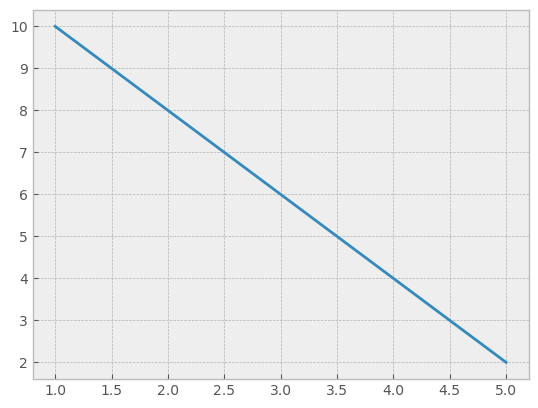

In [324]:
# 47. Побудуй простий лінійний графік:  

x = [1, 2, 3, 4, 5]  
y = [10, 8, 6, 4, 2]  
plt.plot(x, y)  
plt.show()  

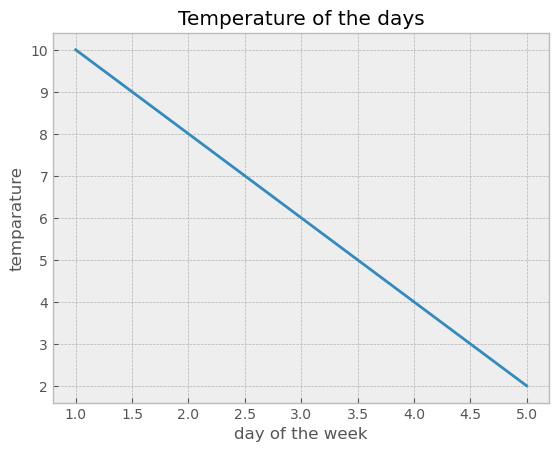

In [325]:
# 48. Додай підписи осей (`xlabel`, `ylabel`) і заголовок (`title`). 

x = [1, 2, 3, 4, 5]  
y = [10, 8, 6, 4, 2]  
plt.plot(x, y)  
plt.xlabel("day of the week")
plt.ylabel("temparature")
plt.title("Temperature of the days")
plt.show()  

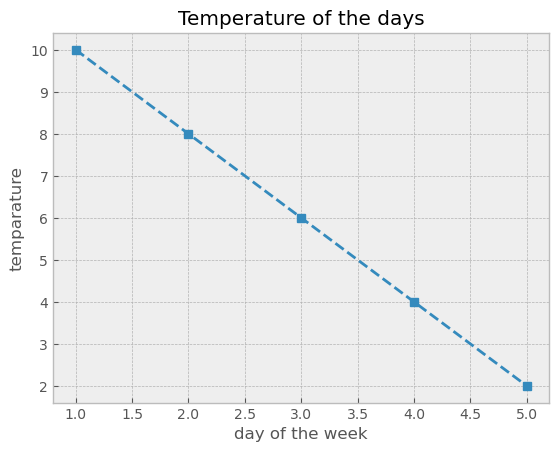

In [326]:
# 49. Змініть зовнішній вигляд лінії: стиль (`'--'`, `'-.'`), маркери (`'o'`, `'s'`), товщину (`linewidth`)

x = [1, 2, 3, 4, 5]  
y = [10, 8, 6, 4, 2]  
plt.plot(x, y, linestyle="--", marker="s", linewidth=2) 
plt.xlabel("day of the week")
plt.ylabel("temparature")
plt.title("Temperature of the days")
plt.show()  

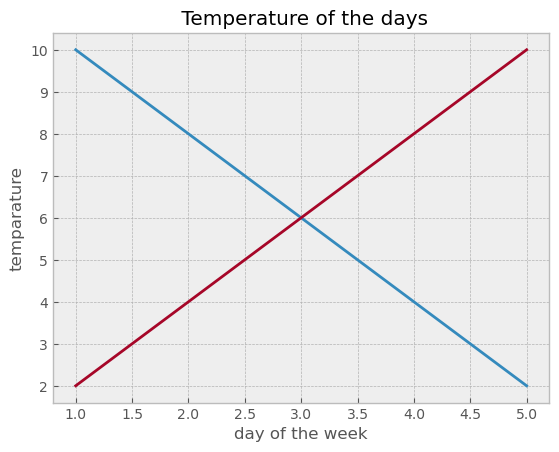

In [327]:
# 50. Побудуй **два графіки на одному полі** (додай другий виклик `plt.plot()` перед `plt.show()`).

x = [1, 2, 3, 4, 5]  
y1 = [10, 8, 6, 4, 2]  
y2 = [2, 4, 6, 8, 10] 
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("day of the week")
plt.ylabel("temparature")
plt.title(" Temperature of the days")
plt.show() 

## Розділ 8. Графіки з pandas + matplotlib
**Мета:** навчитися будувати графіки безпосередньо з DataFrame.

**Завдання 51–60:**
51. Створи DataFrame з продажами по місяцях: стовпці `"Month"`, `"Revenue"`.  
52. Побудуй лінійний графік `Revenue` по місяцях (`df.plot(x="Month", y="Revenue")`).  
53. Побудуй стовпчикову діаграму продажів по категоріях (`bar`).  
54. Побудуй горизонтальну стовпчикову діаграму (`barh`).  
55. Побудуй кругову діаграму (`pie`) для відсотку продажів по категоріях.  
56. Створи DataFrame з віком клієнтів і побудуй гістограму розподілу віку (`hist`).  
57. Побудуй `boxplot` для цін (`Price`).  
58. Побудуй `scatter plot` між `"Price"` і `"Quantity"`.  
59. Зміни стиль графіка (наприклад, `plt.style.use("ggplot")`).  
60. Додай підписи значень на стовпчиковому графіку (через `plt.text` або `ax.bar_label()`).  

In [328]:
# 51. Створи DataFrame з продажами по місяцях: стовпці `"Month"`, `"Revenue"`.  

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

revenue = [12000, 15000, 18000, 17000, 21000, 19500, 22000, 25000, 24000, 26000, 30000, 32000]

сategory = [ "Electronics", "Electronics", "Office", "Office", "Clothing", "Clothing", "Electronics", "Electronics", "Office", "Clothing", "Electronics", "Office"
]

df_revenue = pd.DataFrame({"Month": months, "Category": сategory, "Revenue": revenue})
df_revenue

,Month,Category,Revenue
0,January,Electronics,12000
1,February,Electronics,15000
2,March,Office,18000
3,April,Office,17000
4,May,Clothing,21000
5,June,Clothing,19500
6,July,Electronics,22000
7,August,Electronics,25000
8,September,Office,24000
9,October,Clothing,26000


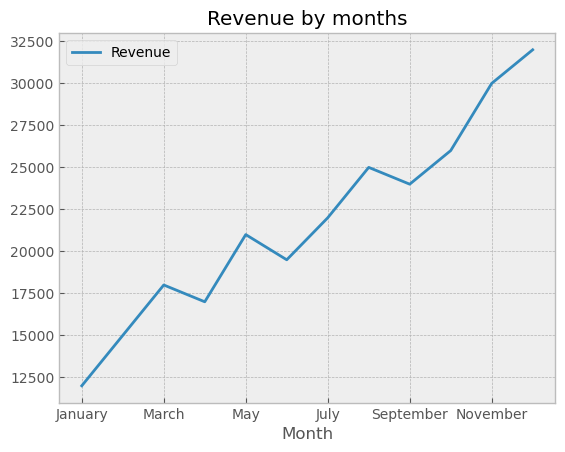

In [329]:
# 52. Побудуй лінійний графік `Revenue` по місяцях (`df.plot(x="Month", y="Revenue")`)

df_revenue.plot(x="Month", y="Revenue", title="Revenue by months")
plt.show() 

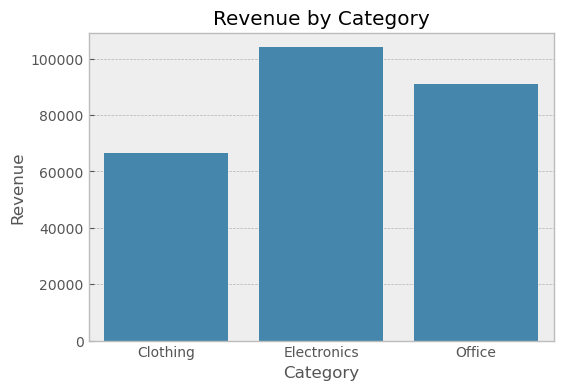

In [330]:
# 53. Побудуй стовпчикову діаграму продажів по категоріях (`bar`).  

import seaborn as sns

df_group = df_revenue.groupby("Category")["Revenue"].sum().reset_index() # .reset_index() перетворює Series → DataFrame

plt.figure(figsize=(6,4)) 

sns.barplot(x="Category", y="Revenue", data=df_group,  errorbar=None)

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

plt.show()

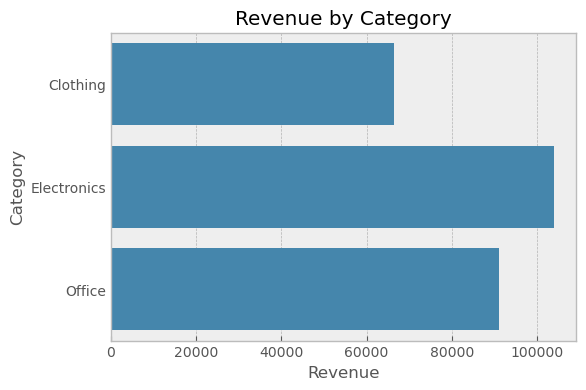

In [331]:
# 54. Побудуй горизонтальну стовпчикову діаграму (`barh`). 

plt.figure(figsize=(6,4))  # розмір графіка

sns.barplot(x="Revenue", y="Category", data=df_group,  errorbar=None)

plt.title("Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")

plt.show()

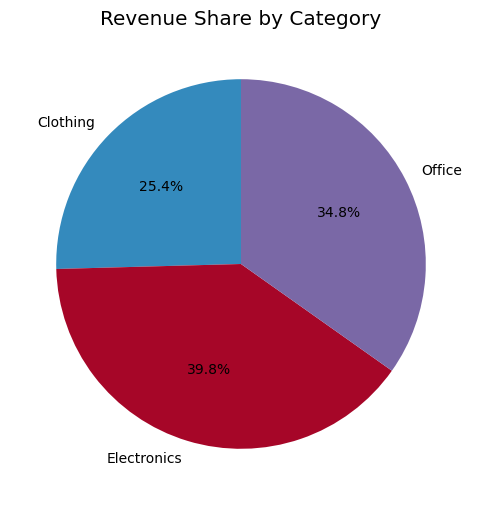

In [332]:
# 55. Побудуй кругову діаграму (`pie`) для відсотку продажів по категоріях.  

plt.figure(figsize=(6, 6))  # Розмір діаграми

plt.pie(
    df_group["Revenue"],        # Значення
    labels=df_group["Category"],# Підписи секторів
    autopct="%1.1f%%",          # Формат відсотків
    startangle=90               # Початковий кут (красивіше)
)

plt.title("Revenue Share by Category")
plt.show()

In [333]:
# 56. Створи DataFrame з віком клієнтів і побудуй гістограму розподілу віку (`hist`). 

df_age = pd.DataFrame({
    "Age": [18, 21, 22, 25, 27, 30, 31, 35, 40, 42, 45, 50, 55, 60, 62, 65, 70]
})


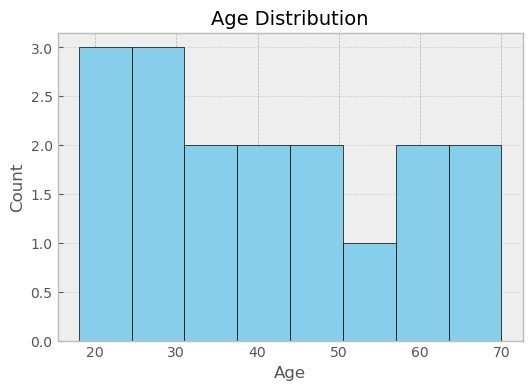

In [334]:
plt.figure(figsize=(6,4)) 

plt.hist(
    df_age["Age"],
    bins=8,
    color="skyblue",       # колір стовпчиків
    edgecolor="black"      # чорні межі
)

plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)  # легка сіточка для зручності читання

plt.show()

Text(0, 0.5, 'Price')

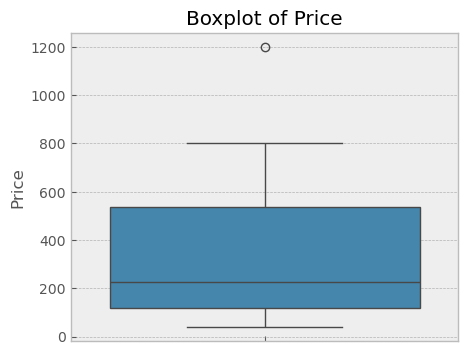

In [335]:
# 57. Побудуй `boxplot` для цін (`Price`).  

plt.figure(figsize=(5,4))

sns.boxplot(y=df_sales["Price"])

plt.title("Boxplot of Price")
plt.ylabel("Price")

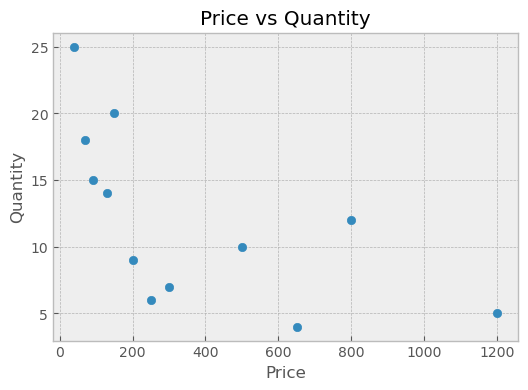

In [336]:
# 58. Побудуй `scatter plot` між `"Price"` і `"Quantity"`.  

plt.figure(figsize=(6,4))

plt.scatter(df_sales["Price"], df_sales["Quantity"])

plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")

plt.show()

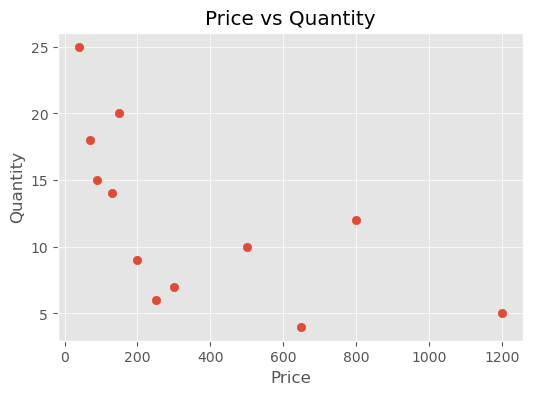

In [337]:
# 59. Зміни стиль графіка (наприклад, `plt.style.use("ggplot")`).  

# Встановлюємо стиль
plt.style.use("ggplot")
# plt.style.use("fivethirtyeight")
# plt.style.use("bmh")

plt.figure(figsize=(6,4))

plt.scatter(df_sales["Price"], df_sales["Quantity"])

plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")

plt.show()

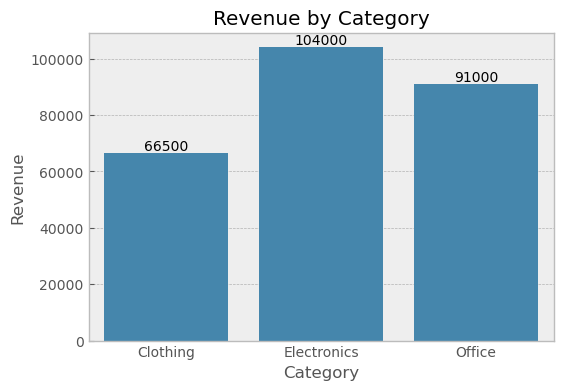

In [338]:
# 60. Додай підписи значень на стовпчиковому графіку (через `plt.text` або `ax.bar_label()`).

plt.style.use("bmh")

plt.figure(figsize=(6,4))
ax = sns.barplot(x="Category", y="Revenue", data=df_group, errorbar=None)

ax.bar_label(ax.containers[0], padding=0)  # ax.containers[0] — перший набір стовпчиків

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

## Розділ 9. Комбіновані завдання (pandas + matplotlib)
**Мета:** поєднати обробку даних та візуалізацію.

**Завдання 61–70:**
61. Створи або зчитай з CSV DataFrame з даними про продажі: дата, товар, категорія, ціна, кількість, місто.  
62. Порахуйте загальний дохід по місяцях і побудуйте лінійний графік.  
63. Визнач топ-3 товари за продажами (за `Revenue`) і побудуй для них стовпчиковий графік.  
64. Побудуй порівняння доходів по містах (стовпчиковий графік).  
65. Обчисли кореляцію між числовими стовпцями (`df.corr()`) і побудуй `heatmap` (через `plt.imshow` або іншу бібліотеку).  
66. Побудуй `subplot` із двома графіками: лінійний (Revenue по місяцях) і стовпчиковий (Revenue по категоріях).  
67. Створи кілька серій даних (наприклад, Revenue за 2 роки) і побудуй їх разом на одному графіку з легендою.  
68. Побудуй графік із вторинною віссю (`twinx`): стовпчики для Revenue і лінія для середньої ціни.  
69. Збережи один із графіків у PNG-файл (`plt.savefig("sales_chart.png", dpi=300)`).  
70. Зроби зведену таблицю продажів по місяцях і побудуй її графік одразу з pandas (`pivot_table` + `.plot()`).  

In [339]:
# 61. Створи або зчитай з CSV DataFrame з даними про продажі: дата, товар, категорія, ціна, кількість, місто. 

data = {
    "Date": ["2025-11-01", "2025-01-02", "2025-09-02", "2025-04-03", "2025-11-03"],
    "Product": ["iPhone 15", "Samsung Galaxy", "Apple Watch", "MacBook Air", "iPad Pro"],
    "Category": ["Smartphones", "Smartphones", "Wearables", "Laptops", "Tablets"],
    "Price": [1200, 1100, 500, 1500, 1000],
    "Quantity": [2, 1, 3, 1, 2],
    "City": ["Berlin", "Berlin", "Hamburg", "Munich", "Berlin"]
}

df_sale = pd.DataFrame(data)

# Перетворимо колонку Date у формат datetime
df_sale["Date"] = pd.to_datetime(df_sale["Date"])
df_sale

,Date,Product,Category,Price,Quantity,City
0,2025-11-01,iPhone 15,Smartphones,1200,2,Berlin
1,2025-01-02,Samsung Galaxy,Smartphones,1100,1,Berlin
2,2025-09-02,Apple Watch,Wearables,500,3,Hamburg
3,2025-04-03,MacBook Air,Laptops,1500,1,Munich
4,2025-11-03,iPad Pro,Tablets,1000,2,Berlin


In [340]:
# 62. Порахуйте загальний дохід по місяцях і побудуйте лінійний графік.  

df_sale["Month"] = df_sale["Date"].dt.month_name()
df_sale["Revenue"] = df_sale["Price"] * df_sale["Quantity"] 
df_sale

,Date,Product,Category,Price,Quantity,City,Month,Revenue
0,2025-11-01,iPhone 15,Smartphones,1200,2,Berlin,November,2400
1,2025-01-02,Samsung Galaxy,Smartphones,1100,1,Berlin,January,1100
2,2025-09-02,Apple Watch,Wearables,500,3,Hamburg,September,1500
3,2025-04-03,MacBook Air,Laptops,1500,1,Munich,April,1500
4,2025-11-03,iPad Pro,Tablets,1000,2,Berlin,November,2000


In [341]:
df_months = df_sale.groupby("Month").agg(Total_Revenue=("Revenue", "sum")).reset_index()
df_months

,Month,Total_Revenue
0,April,1500
1,January,1100
2,November,4400
3,September,1500


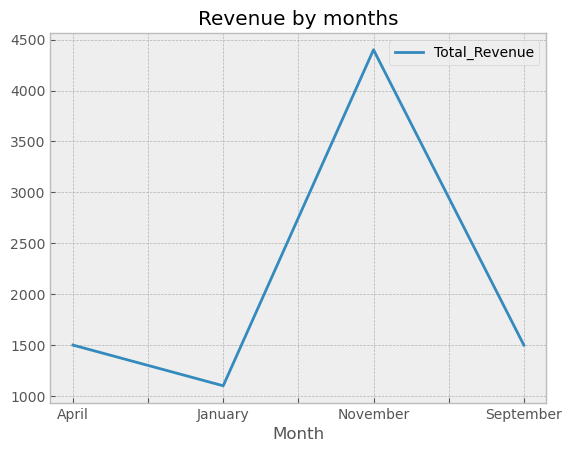

In [342]:
df_months.plot(x="Month", y="Total_Revenue", title="Revenue by months")
plt.show() 

In [343]:
# 63. Визнач топ-3 товари за продажами (за `Revenue`) і побудуй для них стовпчиковий графік.  

df_product = df_sale.groupby("Product").agg(Total_Revenue=("Revenue", "sum")).reset_index()
df_top = df_product.sort_values(by="Total_Revenue", ascending=False).head(3)

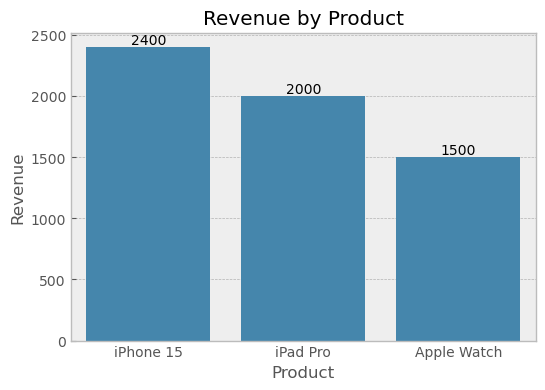

In [344]:
plt.style.use("bmh")

plt.figure(figsize=(6,4))

ax = sns.barplot(x="Product", y="Total_Revenue", data=df_top, errorbar=None)

ax.bar_label(ax.containers[0], padding=0)  # ax.containers[0] — перший набір стовпчиків

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

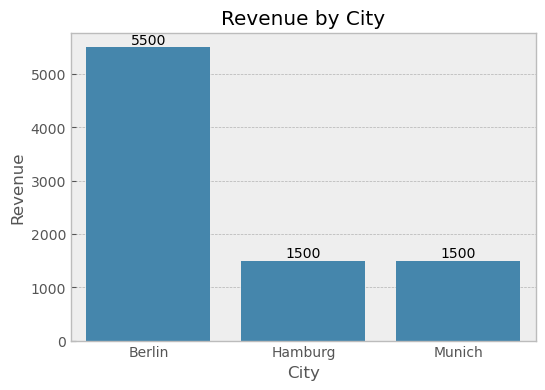

In [345]:
# 64. Побудуй порівняння доходів по містах (стовпчиковий графік).  

df_city = df_sale.groupby("City")["Revenue"].sum().reset_index()

plt.figure(figsize=(6,4))

ax = sns.barplot(x="City", y="Revenue", data=df_city, errorbar=None)

ax.bar_label(ax.containers[0], padding=0)  # ax.containers[0] — перший набір стовпчиків

plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()

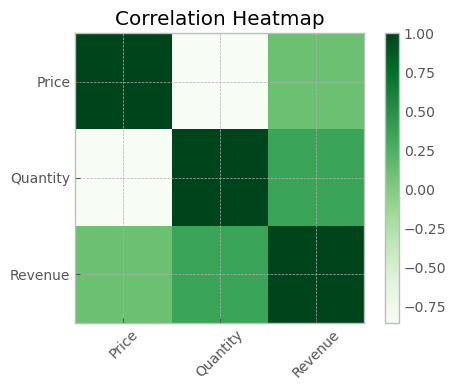

In [346]:
# 65. Обчисли кореляцію між числовими стовпцями (`df.corr()`) і побудуй `heatmap` (через `plt.imshow` або іншу бібліотеку). 

# Обчислюємо кореляцію тільки для числових стовпців
corr = df_sale.corr(numeric_only=True)

# Візуалізація через heatmap (plt.imshow)
plt.figure(figsize=(5,4))

plt.imshow(corr, cmap="Greens") # будує матрицю кореляцій

plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.colorbar() # додає шкалу значень
plt.tight_layout()

plt.show()

       Month  Total_Revenue
0      April           1500
1    January           1100
2   November           4400
3  September           1500
             Total_Revenue
Category                  
Laptops               1500
Smartphones           3500
Tablets               2000
Wearables             1500


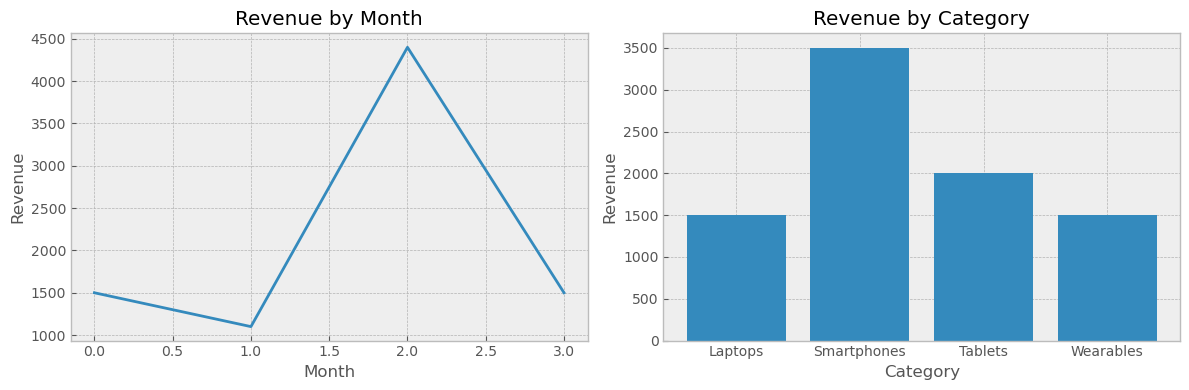

In [347]:
# 66. Побудуй `subplot` із двома графіками: лінійний (Revenue по місяцях) і стовпчиковий (Revenue по категоріях). 

df_category = df_sale.groupby("Category").agg(Total_Revenue=("Revenue", "sum"))
print(df_months)
print(df_category)

# --- Створюємо subplot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ---- Лінійний графік ----
ax1.plot(df_months.index, df_months["Total_Revenue"])
ax1.set_title("Revenue by Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Revenue")

# ---- Стовпчиковий графік ----
ax2.bar(df_category.index, df_category["Total_Revenue"])
ax2.set_title("Revenue by Category")
ax2.set_xlabel("Category")
ax2.set_ylabel("Revenue")

plt.tight_layout()
plt.show()

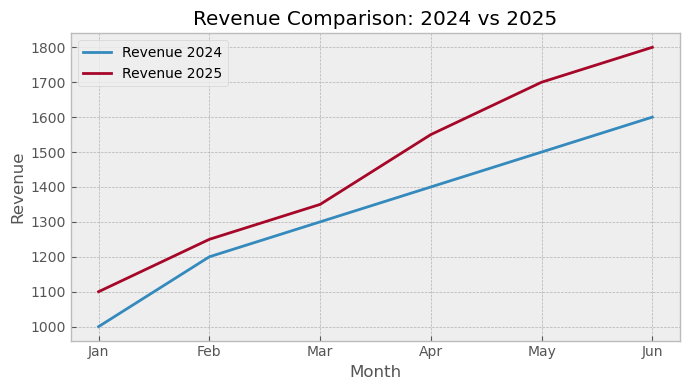

In [348]:
# 67. Створи кілька серій даних (наприклад, Revenue за 2 роки) і побудуй їх разом на одному графіку з легендою.  

data_new = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Revenue_2024": [1000, 1200, 1300, 1400, 1500, 1600],
    "Revenue_2025": [1100, 1250, 1350, 1550, 1700, 1800]
}

df_new = pd.DataFrame(data_new)

plt.figure(figsize=(7,4))

# Лінія за 2024 рік
plt.plot(df_new["Month"], df_new["Revenue_2024"], label="Revenue 2024")

# Лінія за 2025 рік
plt.plot(df_new["Month"], df_new["Revenue_2025"], label="Revenue 2025")

plt.title("Revenue Comparison: 2024 vs 2025")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Легенда
plt.legend()

plt.tight_layout() # автоматично підганяє елементи графіка, щоб вони не накладалися один на одного
plt.show()

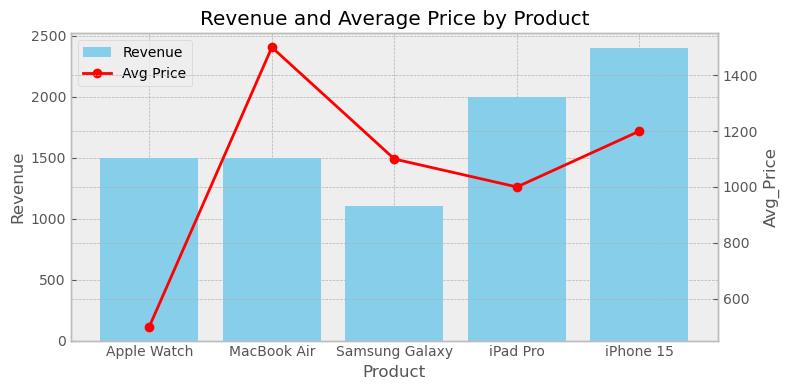

In [349]:
# 68. Побудуй графік із вторинною віссю (`twinx`): стовпчики для Revenue і лінія для середньої ціни.  

df_product = df_sale.groupby("Product").agg(Total_Revenue=("Revenue", "sum")).reset_index()

df_avg_price = df_sale.groupby("Product").agg(Avg_Price=("Price", "mean")).reset_index()

fig, ax1 = plt.subplots(figsize=(8,4))

# --- Стовпчики для Revenue ---
ax1.bar(df_product["Product"], df_product["Total_Revenue"], color="skyblue", label="Revenue")
ax1.set_xlabel("Product")
ax1.set_ylabel("Revenue")
ax1.set_title("Revenue and Average Price by Product")

# --- Вторинна вісь для Avg_Price ---
ax2 = ax1.twinx()
ax2.plot(df_avg_price["Product"], df_avg_price["Avg_Price"], color="red", marker="o", label="Avg Price")
ax2.set_ylabel("Avg_Price")

# --- Легенда ---
# Легенду можна об'єднати з обох осей
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()


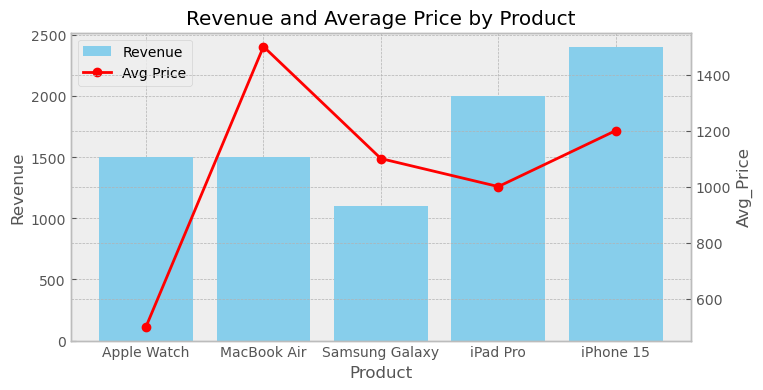

In [350]:
# 69. Збережи один із графіків у PNG-файл (`plt.savefig("sales_chart.png", dpi=300)`).  

fig, ax1 = plt.subplots(figsize=(8,4))

# --- Стовпчики для Revenue ---
ax1.bar(df_product["Product"], df_product["Total_Revenue"], color="skyblue", label="Revenue")
ax1.set_xlabel("Product")
ax1.set_ylabel("Revenue")
ax1.set_title("Revenue and Average Price by Product")

# --- Вторинна вісь для Avg_Price ---
ax2 = ax1.twinx()
ax2.plot(df_avg_price["Product"], df_avg_price["Avg_Price"], color="red", marker="o", label="Avg Price")
ax2.set_ylabel("Avg_Price")

# --- Легенда ---
# Легенду можна об'єднати з обох осей
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# --- Збереження графіка ---
plt.savefig("sales_chart.png", dpi=300)  # dpi=300 для високої якості


Category   Laptops  Smartphones  Tablets  Wearables
Month                                              
April       1500.0          NaN      NaN        NaN
January        NaN       1100.0      NaN        NaN
November       NaN       2400.0   2000.0        NaN
September      NaN          NaN      NaN     1500.0


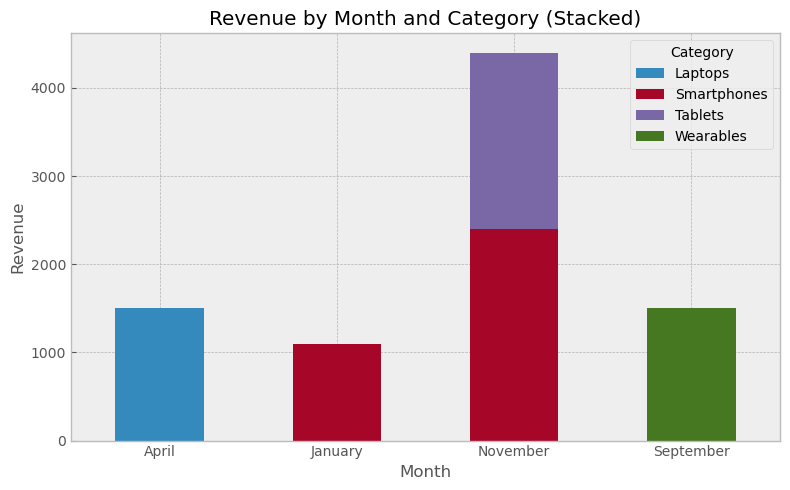

In [351]:
# 70. Зроби зведену таблицю продажів по місяцях і побудуй її графік одразу з pandas (`pivot_table` + `.plot()`). 

pivot_sale = df_sale.pivot_table(
    index="Month",
    columns="Category",
    values="Revenue",
    aggfunc="sum"
)

print(pivot_sale.round(2)) 

pivot_sale.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Revenue by Month and Category (Stacked)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.show()